## Importing libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data set

The data set is assigned to a Pandas data frame.
The `BasketDate` is converted from 'str' to 'datetime'.

In [91]:
df = pd.read_csv('data/customer_supermarket.csv', sep='\t', index_col=0, decimal=',')

# convert dates in a suitable format
df['BasketDate'] = pd.to_datetime(df['BasketDate'], dayfirst=True)

# add 'Amount' attribute, useful for some additional features on customer's purchase behaviour
df['Amount'] = df['Sale'] * df['Qta']

# Types of attributes and null values

Description of the dataset

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  object        
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
 8   Amount           471910 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.0+ MB


Count of null values, for each attribute

In [93]:
df.isnull().sum(axis = 0)

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65080
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
Amount                 0
dtype: int64

All the `ProdDescr` missing values are already included in the `CustomerID` ones.
In fact, if we count all the rows where both the attributes are null:

In [94]:
df[df['CustomerID'].isnull() & df['ProdDescr'].isnull()].count()

BasketID           753
BasketDate         753
Sale               753
CustomerID           0
CustomerCountry    753
ProdID             753
ProdDescr            0
Qta                753
Amount             753
dtype: int64

## Analysis of single attributes
### BasketID
Count number of distinct baskets

In [95]:
bid_counts = df['BasketID'].value_counts()
bid_counts.describe()

count    24627.000000
mean        19.162302
std         28.635400
min          1.000000
25%          2.000000
50%         11.000000
75%         24.000000
max        542.000000
Name: BasketID, dtype: float64

### Sale, Qta

We noticed there are 1279 sales with null cost and 9752 with negative quantity.

In [96]:
# rows with null cost
cost_zero = df['Sale'] == 0
df[cost_zero].count()

BasketID           1279
BasketDate         1279
Sale               1279
CustomerID           40
CustomerCountry    1279
ProdID             1279
ProdDescr           526
Qta                1279
Amount             1279
dtype: int64

In [97]:
# rows with negative qta
neg_qta = df['Qta'] < 0
df[neg_qta].count()

BasketID           9752
BasketDate         9752
Sale               9752
CustomerID         8905
CustomerCountry    9752
ProdID             9752
ProdDescr          9305
Qta                9752
Amount             9752
dtype: int64

In [98]:
df[cost_zero & neg_qta].count()

BasketID           668
BasketDate         668
Sale               668
CustomerID           0
CustomerCountry    668
ProdID             668
ProdDescr          221
Qta                668
Amount             668
dtype: int64

We decided to drop these transactions, because they're not relevant for our purposes.

In [99]:
# drop rows with negative quantity
df.drop(df[neg_qta].index, inplace=True)
# drop rows with null cost
df.drop(df[cost_zero].index, inplace=True)

<ipython-input-99-d7c44caa6125>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[cost_zero].index, inplace=True)


### BasketDate

Some statistics on the dates.

In [100]:
bd_counts = df['BasketDate'].dt.date.value_counts()
print("Min date:", str(min(df['BasketDate'])))
print("Max date:", str(max(df['BasketDate'])))
print("Day with more sales:", str(bd_counts.index[0]))
print("Day with less sales:", str(bd_counts.index[-1]))

Min date: 2010-12-01 08:26:00
Max date: 2011-12-09 12:50:00
Day with more sales: 2011-12-05
Day with less sales: 2010-12-22


[]

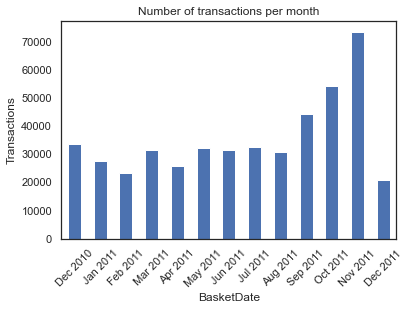

In [101]:
a = df.groupby(pd.Grouper(key='BasketDate', freq='M'))['BasketID'].count()
a.index = a.index.strftime('%b %Y')
aplt = a.plot(kind='bar', title='Number of transactions per month', rot=45)

aplt.set_ylabel('Transactions')
aplt.plot()

### CustomerID
How many transactions each customer made?

count    4338.000000
mean       91.720839
std       228.785054
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: CustomerID, dtype: float64


Text(0, 0.5, 'Transactions')

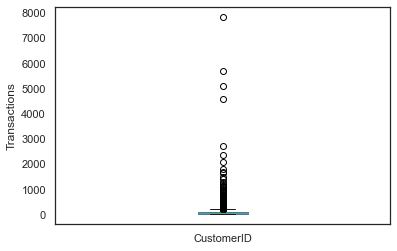

In [102]:
cid_counts = df['CustomerID'].value_counts()
print(cid_counts.describe())
cidplot = cid_counts.plot.box()
cidplot.set_ylabel("Transactions")

As seen before, we have 65080 null values for this attribute.
We removed transactions with null `CustomerID`.

In [103]:
# drop rows with null customerID
df.dropna(subset=['CustomerID'], inplace=True)

# export cleaned dataset for further analysis
df.to_csv(r'data/clean_df.csv', index=True, header=True)


#### CustomerCountry

<AxesSubplot:xlabel='CustomerCountry'>

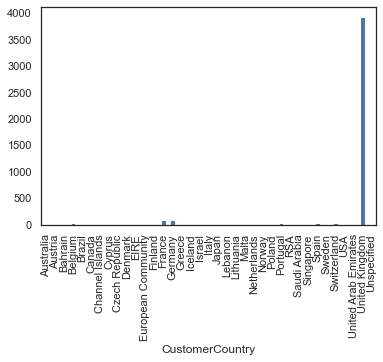

In [104]:
cc_counts = df.groupby(['CustomerCountry', 'CustomerID']).size().groupby(level=0).size()
cc_counts.plot.bar()

### ProdID, ProdDescr

In [105]:
pid_counts = df['ProdID'].value_counts()
print(pid_counts.describe())

best_seller_id = pid_counts.index[0]
best_seller_descr = df.loc[df['ProdID'] == best_seller_id]['ProdDescr'].iloc[0]
print("Best seller: {} ({})".format(str(best_seller_id), str(best_seller_descr)))

worst_seller_id = pid_counts.index[-1]
worst_seller_descr = df.loc[df['ProdID'] == worst_seller_id]['ProdDescr'].iloc[0]
print("Worst seller: {} ({})".format(str(worst_seller_id), str(worst_seller_descr)))

count    3665.000000
mean      108.563438
std       163.762072
min         1.000000
25%        12.000000
50%        49.000000
75%       135.000000
max      2035.000000
Name: ProdID, dtype: float64
Best seller: 85123A (WHITE HANGING HEART T-LIGHT HOLDER)
Worst seller: 90039B (FIRE POLISHED GLASS BRACELET MONTAN)


## Correlation

To calculate pairwise correlation, we transformed some attributes into categorical ones. Due to implementation reasons,
`ProdDescr` had to be treated differently from other attributes.
For this reason, we introduced a dictionary: for each string (key) we assigned an incremental identifier (value).

In [106]:
df_corr = df.copy()

df_corr['ProdID'] = df_corr['ProdID'].astype('category').cat.codes
df_corr.sort_values(by=['ProdID'], inplace=True)
obj = {}
idx = 0
s = ""
for index, row in df_corr.iterrows():
    if row['ProdDescr'] != s:
        s = row['ProdDescr']
        obj[s] = idx
        idx += 1

Then we replaced all the descriptions with their associated identifier and this way we proceeded to calculate the
pairwise correlation, represented by a heatmap.

In [107]:
df_corr['ProdDescr'].replace(obj, inplace=True)

df_corr['BasketID'] = df_corr['BasketID'].astype('category').cat.codes
df_corr['BasketDate'] = df_corr['BasketDate'].astype('category').cat.codes
df_corr['CustomerID'] = df_corr['CustomerID'].astype('category').cat.codes
df_corr['CustomerCountry'] = df_corr['CustomerCountry'].astype('category').cat.codes

<AxesSubplot:>

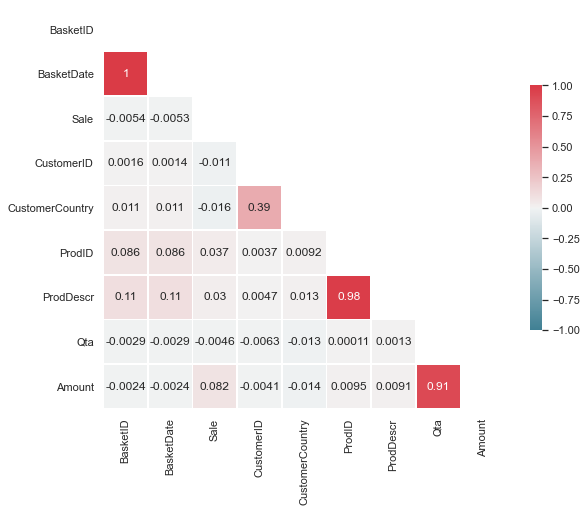

In [108]:
import seaborn as sns

correlation = df_corr.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap,annot=True, vmax=1,vmin=-1,
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

## Requested features
I, Iu, Imax

In [109]:
df_customer = df.groupby('CustomerID').agg(
    I=('ProdID','count'),
    Iu=('ProdID', 'nunique'))

df_customer['Imax'] = df.groupby(['CustomerID','BasketID']).count().max(level=0)['BasketDate']

Entropy

In [110]:
pos_amounts = df[df['Amount'] >= 0].copy()
p_sum = pos_amounts.groupby('CustomerID')['Amount'].transform('sum')
probs = pos_amounts['Amount']/p_sum
pos_amounts['Entropy'] = -(probs * np.log(probs)) #ss.entropy(probs)
df_customer['Entropy'] = pos_amounts.groupby('CustomerID')['Entropy'].sum()

## New features

Number of Baskets per customer.

In [111]:
# number of baskets per customer
df_customer['BasketNum'] = df.groupby(['CustomerID', 'BasketID']).size().groupby(level=0).size()

Sum and Average expenditure for each customer.

In [112]:
df_group = df.groupby(['CustomerID','BasketID']).agg(BasketSum=('Amount', 'sum'))
df_group = df_group.groupby('CustomerID').agg(BasketMean=('BasketSum', 'mean'), SumExp=('BasketSum', 'sum'))
df_customer['SumExp'] = df_group['SumExp']
df_customer['AvgExp'] = df_group['BasketMean']

## Analysis of new dataset
Combining the required features with the new ones,
we have created a new dataset, useful for subsequent clustering tasks

In [113]:
df_customer.describe()

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,91.720839,61.501153,32.086445,3.432994,4.272015,2054.270609,419.167327
std,228.785054,85.366768,31.243562,1.287378,7.697998,8989.229895,1796.537828
min,1.000000,1.000000,1.000000,0.000000,1.000000,3.750000,3.450000
25%,17.000000,16.000000,13.000000,2.612131,1.000000,307.415000,178.625000
50%,41.000000,35.000000,23.000000,3.478995,2.000000,674.485000,293.900000
75%,100.000000,77.000000,42.000000,4.327716,5.000000,1661.740000,430.113750
max,7847.000000,1787.000000,542.000000,8.335226,209.000000,280206.020000,84236.250000


<AxesSubplot:>

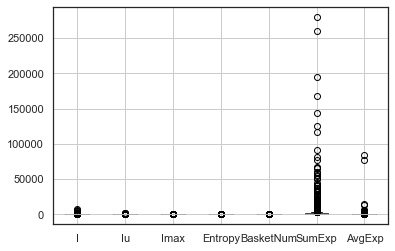

In [114]:
df_customer.boxplot()

## Remove outliers from the new dataset
We exploited the metric of Z-Score.

In [115]:
# use z-score to remove outliers
from scipy.stats import zscore
z_scores = zscore(df_customer)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_customer[filtered_entries]

new_df.to_csv(r'data/new_df.csv', index=True, header=True)

new_df.describe()

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,70.315032,52.372812,28.871014,3.350154,3.579238,1327.559716,354.999266
std,86.624853,53.545089,22.914839,1.222166,3.794688,2058.227242,329.019302
min,1.000000,1.000000,1.000000,0.000000,1.000000,3.750000,3.450000
25%,16.000000,15.000000,12.000000,2.577585,1.000000,300.935000,176.802500
50%,39.000000,33.000000,23.000000,3.411811,2.000000,640.760000,287.035000
75%,90.000000,71.000000,39.000000,4.220842,4.000000,1521.170000,417.920000
max,756.000000,315.000000,125.000000,6.334695,27.000000,28754.110000,4932.130000


<AxesSubplot:>

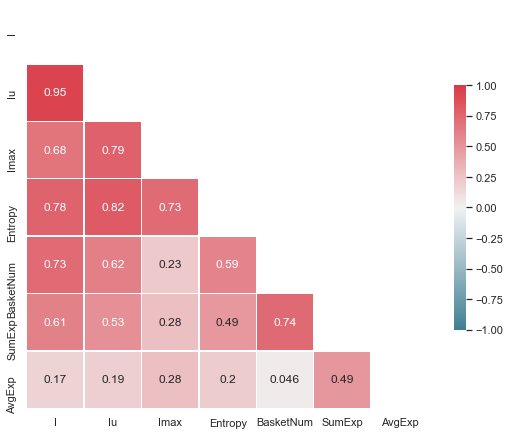

In [116]:
correlation = new_df.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fnew, axnew = plt.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap,annot=True, vmax=1,vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})